In [22]:
import ipywidgets as widgets
from ipywidgets import interact, fixed
import doodads as dd
import astropy.units as u
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Wavelength [m]', ylabel='Transmission'>

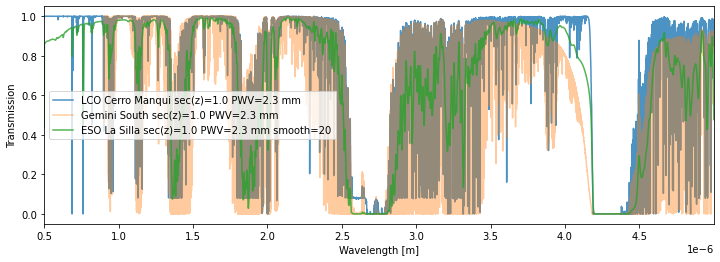

In [40]:
plt.figure(figsize=(12, 4))
dd.MANQUI_ATMOSPHERES.get(airmass=1, pwv=2.3 * u.mm).display(alpha=0.8)
dd.GEMINI_SOUTH_ATMOSPHERES.get(airmass=1, pwv=2.3 * u.mm).display(alpha=0.4)
dd.LA_SILLA_ATMOSPHERES.get(airmass=1, pwv=2.3 * u.mm).smooth(20).display(alpha=0.8)

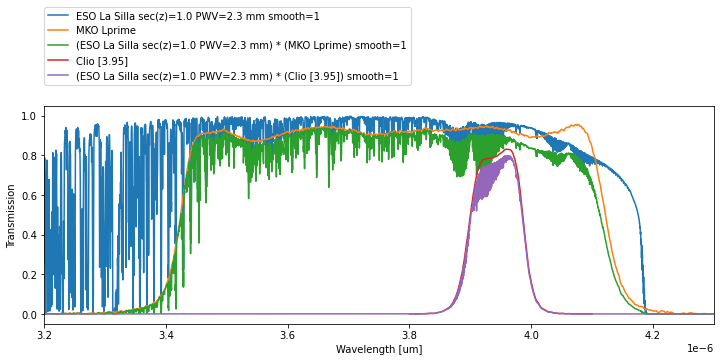

In [41]:
def plot_one_atmosphere(library, pwv_mm, airmass=1, smooth=1):
    fig, ax = plt.subplots(figsize=(12, 4))
    spec = library.get(airmass=airmass, pwv=pwv_mm * u.mm)
    spec.smooth(smooth).display(ax=ax)
    dd.MKO.Lprime.display(ax=ax)
    spec.multiply(dd.MKO.Lprime).smooth(smooth).display(ax=ax)
    dd.CLIO_3_9_FILTER.display(ax=ax)
    spec.multiply(dd.CLIO_3_9_FILTER).smooth(smooth).display(ax=ax, begin=3.2*u.um, end=4.3*u.um)
    plt.legend(loc=(0, 1.1))

plot_one_atmosphere(dd.LA_SILLA_ATMOSPHERES, 2.3, 1)

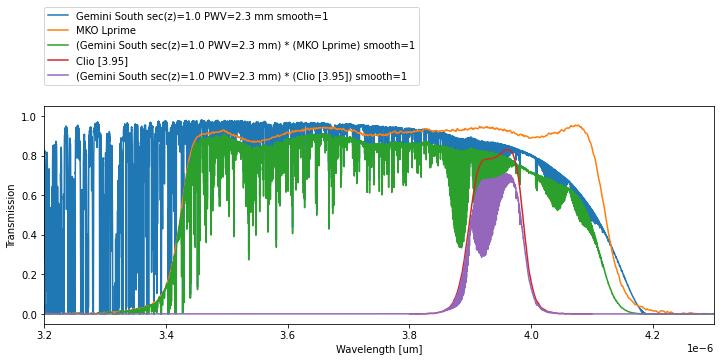

In [25]:
plot_one_atmosphere(dd.GEMINI_SOUTH_ATMOSPHERES, 2.3, 1)

In [39]:
interact(plot_one_atmosphere, 
         library=fixed(dd.MANQUI_ATMOSPHERES),
         smooth=(1, 100, 1),
         **{name: (val[0], val[1], 0.01) for name, val in dd.MANQUI_ATMOSPHERES.bounds.items()});

interactive(children=(FloatSlider(value=6.25, description='pwv_mm', max=12.5, step=0.01), FloatSlider(value=1.…

In [6]:
interact(plot_one_atmosphere, 
         library=fixed(dd.GEMINI_SOUTH_ATMOSPHERES),
         smooth=(1, 100, 1),
         **{name: (val[0], val[1], 0.01) for name, val in dd.GEMINI_SOUTH_ATMOSPHERES.bounds.items()});

interactive(children=(FloatSlider(value=6.15, description='pwv_mm', max=10.0, min=2.3, step=0.01), FloatSlider…

In [7]:
_EXAMPLE_POST_DICT = {
    "INS.NAME": "SKYCALC",
    "INS.MODE": "swspectr",
    "POSTFILE.FLAG": 0,
    "TEL.SITE.HEIGHT": 2400,
    "SKYMODEL.TARGET.ALT": 90.0,
    "SKYMODEL.TARGET.AIRMASS": 1,
    "SKYMODEL.SEASON": 0,
    "SKYMODEL.TIME": 0,
    "SKYMODEL.PWV": 0.50,
    "SKYMODEL.MSOLFLUX": 130.00,
    "SKYMODEL.VACAIR": "vac",
    "SKYMODEL.WAVELENGTH.MIN": 500.00,
    "SKYMODEL.WAVELENGTH.MAX": 5000.00,
    "SKYMODEL.WAVELENGTH.GRID.MODE": "fixed_spectral_resolution",
    "SKYMODEL.WAVELENGTH.RESOLUTION": 20000,
    "SKYMODEL.LSF.KERNEL.TYPE": "none",
}

In [8]:
import requests

In [9]:
zenith_angle_deg, pwv_mm = 0, 2.0
postdata = _EXAMPLE_POST_DICT.copy()
postdata["TEL.SITE.HEIGHT"] = 2400 # int(dd.MagellanFacts.h.to(u.m).value)
postdata["SKYMODEL.TARGET.ALT"] = 90 - zenith_angle_deg
postdata["SKYMODEL.TARGET.AIRMASS"] = 1 / np.cos(np.deg2rad(zenith_angle_deg))
postdata["SKYMODEL.PWV"] = f"{pwv_mm:3.1f}"
resp = requests.post("https://www.eso.org/observing/etc/bin/simu/skycalc", data=postdata)

In [10]:
x = resp.text

In [11]:
x

'<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">\n<html>\n  <head>\n    <meta http-equiv="Content-Script-Type" content="text/javascript">\n    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n    <meta http-equiv="Content-Style-Type" content="text/css">\n    <meta http-equiv="Pragma" content="no-cache">\n    <meta http-equiv="Expires" content="-1">\n    <title> Sky Model Calculator</title>\n    <link rel="stylesheet" type="text/css" href="/observing/etc/jslib/jquery-ui/jquery-ui.css?v=6fd5a6e8197041971d02cf62d06f4b14">\n    <link rel="stylesheet" type="text/css" href="/observing/etc/jslib/jquery-ui/jquery-ui.theme.css?v=c4679db4adb3f9b8089213c6c396e2ee">\n    <link rel="stylesheet" type="text/css" href="/observing/etc/jslib/jquery-ui-timepicker-addon.min.css?v=934860b35a68f8a5a8675e952a644d5b">\n    <link rel="stylesheet" type="text/css" href="/observing/etc/etcConfig/css/validate-styles.css?v=21661afaec18f44edc832583a059587b">\n    <link rel="styles

In [12]:
import re

In [13]:
table_path = re.findall(r'/observing/etc/tmp/.+/skytable.fits', x)[0]

In [14]:
dir(resp)

['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 '_next',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

In [15]:
type(resp.content)

bytes

In [16]:
hdul = fits.open('https://www.eso.org' + table_path, cache=False)

In [17]:
hdul.info()

Filename: /var/folders/2l/wnp3svfs1493lv5t48c9kjt40000gn/T/astropy-download-94445-xebkkdi4
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1                1 BinTableHDU     89   46052R x 18C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D]   


In [18]:
pd.DataFrame(hdul[1].data)

,lam,flux,dflux1,dflux2,trans,dtrans1,dtrans2,flux_sml,flux_ssl,flux_zl,flux_tie,flux_tme,flux_ael,flux_arc,trans_ma,trans_o3,trans_rs,trans_ms
0,500.000000,0.0,0.0,0.0,0.862397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.999958,0.991927,0.899127,0.966997
1,500.025001,0.0,0.0,0.0,0.862404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.999956,0.991912,0.899147,0.966999
2,500.050003,0.0,0.0,0.0,0.862410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.999955,0.991897,0.899166,0.967001
3,500.075006,0.0,0.0,0.0,0.862417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.999953,0.991882,0.899186,0.967003
4,500.100010,0.0,0.0,0.0,0.862417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.999945,0.991867,0.899206,0.967006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46047,4998.824673,0.0,0.0,0.0,0.931859,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.933170,1.000000,0.999994,0.998602
46048,4999.074621,0.0,0.0,0.0,0.925684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.926987,1.000000,0.999994,0.998602
46049,4999.324581,0.0,0.0,0.0,0.916209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.917498,1.000000,0.999994,0.998602
46050,4999.574553,0.0,0.0,0.0,0.903256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.904526,1.000000,0.999994,0.998602


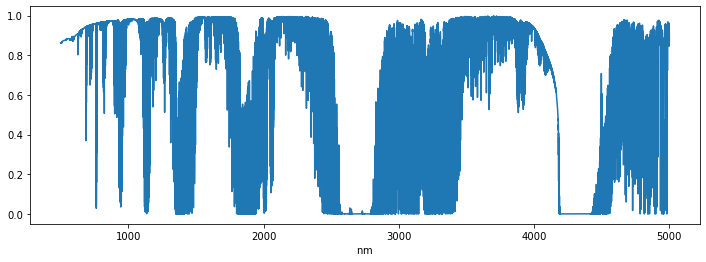

In [19]:
plt.figure(figsize=(12,4))
plt.plot(
    hdul[1].data['lam'] * u.nm,
    hdul[1].data['trans']
)
# plt.yscale('log')

In [20]:
hdul[1].data['lam'].dtype

dtype('>f8')

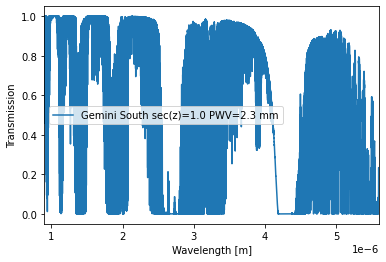

In [21]:
dd.GEMINI_SOUTH_ATMOSPHERES.get(airmass=1, pwv=2.3*u.mm)